## Fitting PDFs for ensembles histograms with error bars

In [1]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

# Required libraries for data arrays, data manipulation, plotting etc
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}",r'\boldmath']


#sns.set(style="white", palette="muted")
#sns.set_context("paper")

### Data import 

In [2]:
data = pd.read_csv("./data/old/small_amp_small_asp.csv")
data.head()

,time,diameter
0,0.0,8.457038
1,6.0,8.530392
2,12.0,8.487853
3,18.0,3.962759
4,18.0,2.250301


#### Loading useful functions from useful_functions.py source file

In [3]:
%load useful_functions.py
from useful_functions import * 

#### Selecting time slice 

In [4]:
d1 = time_slice(data, 18)
print(d1, len(d1[:,1]))

[[18.          3.96275851]
 [18.          2.25030119]
 [18.          4.78834848]
 ...
 [18.          4.65418285]
 [18.          1.59542155]
 [18.          3.71728557]] 265466


#### Computing average heights and error bars for histogram

In [5]:
heights = ensemble_heights(data=d1[:,1]/2.0, size_per_sample=100000, n_samples=100, n_bins=25)

error_d1 = ensemble_error_heights(n_bootstrap=50, data=d1[:,1]/2.0, size_per_sample= 100000, n_samples=100, n_bins= 25)


#### Plotting ensemble averaged histogram with error bars 

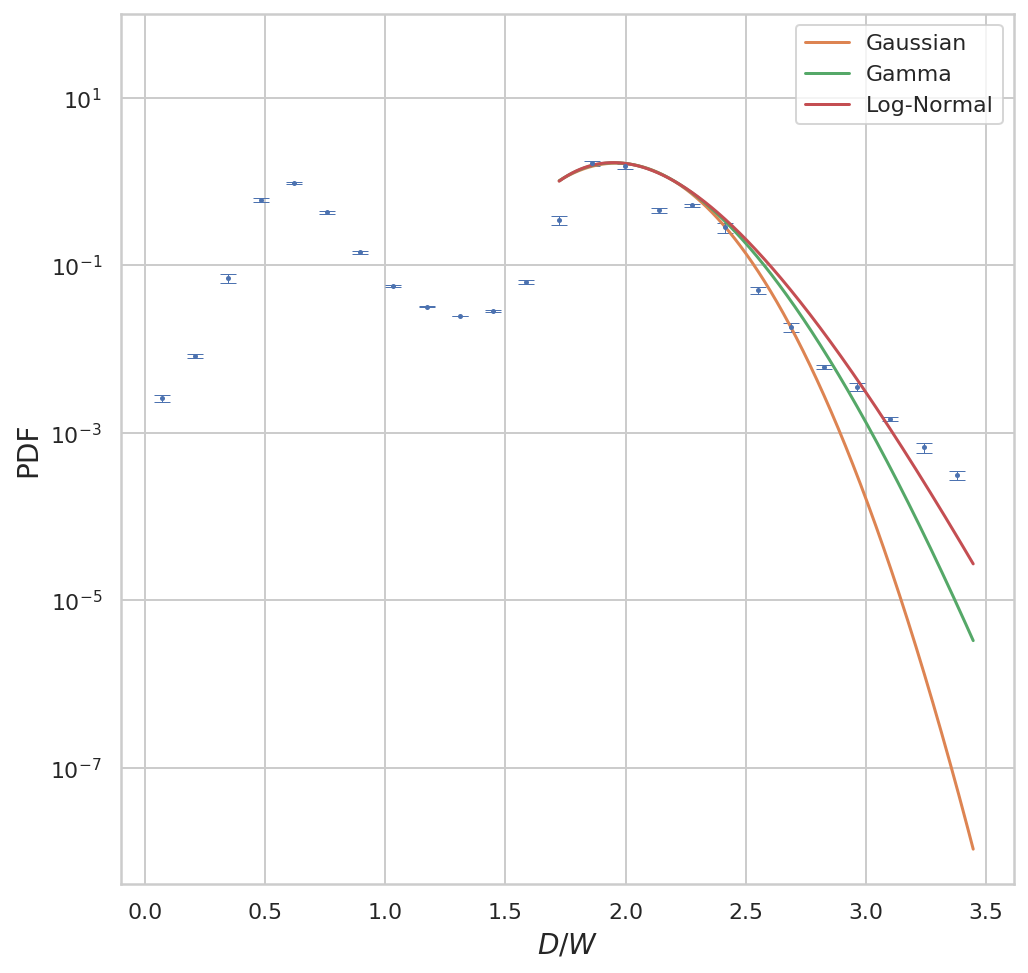

In [6]:
fit_x, fit_y, xspace = plot_histogram_error(data=d1[:,1]/2.0, size_per_sample=100000, n_bins=25, heights=heights, errors=error_d1)


limit = 16

popt_gauss , pcov_gauss = fit(fit_x[-limit:],fit_y[-limit:], gauss)
plt.plot(xspace[5000:], gauss(xspace[5000:], *popt_gauss), label="Gaussian"); 

popt_gamma, pcov_gamma = fit(fit_x[-limit:], fit_y[-limit:], gamma_n)
plt.plot(xspace[5000:], gamma_n(xspace[5000:], *popt_gamma), label="Gamma"); 

popt_lognorm, pcov_lognorm = fit(fit_x[-limit:], fit_y[-limit:], lognorm)
plt.plot(xspace[5000:], lognorm(xspace[5000:], *popt_lognorm), label="Log-Normal"); 

#popt_poisson, pcov_poisson = fit(fit_x[-limit:], fit_y[-limit:], poisson)
#plt.plot(xspace[5000:], poisson(xspace[5000:], *popt_poisson), label="Poisson"); 

plt.ylim(top= 1e2);
plt.yscale('log', basey = 10);
plt.legend();



#### Things to do : 
- Linear regression on double log scales
- Null-hypothesis testing on double log scale slopes
- Repeat for above steps for different time slices